In [1]:
from keras.models import *
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
import os

Using TensorFlow backend.
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
with open('./Checkpoints/fcn_cvtn.json', 'r') as model_file:
    model = model_from_json(model_file.read())

In [3]:
model.load_weights('./Checkpoints/fcn_cvtn.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 240, 320, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 240, 320, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 240, 320, 16) 2320        conv2d_2[0][0]                   
____________________________________________________________________________________________

In [2]:
from Models.refinenet.refinennet_model import *
model = Refinenet(n_classes= 2)
run_model = model.chose_model(0)[0]
run_model.load_weights('./Checkpoints/cvtn_refine.h5')

1579508801459.jpg


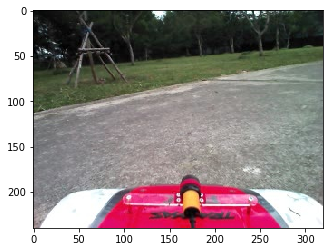

In [10]:
rand = np.random.randint(250)
count = 0
for dirr in os.listdir('Data/CVTN/Road/Raw/Biru - 2/'):
    if '.jpg' in dirr:
        if count < rand:
            count += 1
            continue
        else:
            print(dirr)
            img = cv2.imread('Data/CVTN/Road/Raw/Biru - 2/' + dirr)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = (img/255).astype('float')
            plt.imshow(img)
            break

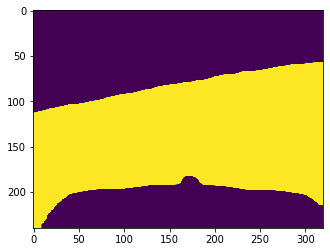

In [11]:
pred = run_model.predict(np.expand_dims(img, 0))
plt.imshow(pred[0][:, :, 0])

In [4]:
cap = cv2.VideoCapture('./outpy.avi')
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        cv2.imshow('rgb', frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = (frame/255).astype('float')
        pred = model.predict(np.expand_dims(frame, 0))
        cv2.imshow('segment', pred[0][:, :, 0])
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        time.sleep(0.05)
    else:
        break
cap.release()
cv2.destroyAllWindows()